# Linear Models

## Linear Regression
$y_i = w_{i0} + w_{i1}x_{i1} + w_{i2}x_{i2} + ... + w_{in}x_{in}  $

$\theta^T = [w_0, w_1, w_2, ... , w_n ]$

$y = \theta^TX$

### Closed form solution
$MAE(\theta) = \frac{1}{m}\sum_{i=0}^m \  (\theta_i^Tx_i - y_i)^2  $

Solution: $ argmin_\theta(MAE) $:

$ ∇MAE = 0 

$ \hat{\theta} = (X^TX)^{-1}X^Ty$

In [1]:
import numpy as np

X = 2* np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

[0, 2, 0, 15]

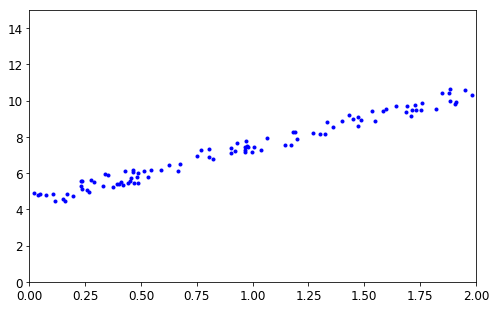

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

plt.figure(figsize = (8,5))
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])

In [8]:
# let's compute the params using the Normal Equation
X_b = np.c_[np.ones((100,1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[ 4.4433735 ],
       [ 3.02927126]])

In [12]:
# we can make predictions now
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.4433735 ],
       [ 10.50191602]])

[0, 2, 0, 15]

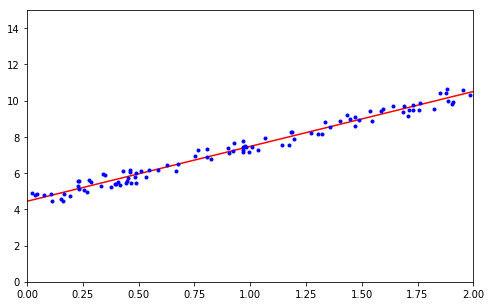

In [17]:
plt.figure(figsize = (8,5))

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])

In [18]:
# or using scikit-learn...
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([ 4.4433735]), array([[ 3.02927126]]))

In [19]:
lr.predict(X_new)

array([[  4.4433735 ],
       [ 10.50191602]])

## Batch Gradient Descent

To implement Gradient Descent you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$

#### Partial derivates of the cost function

$ \dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)} $

#### Gradient vector of the cost function

$
\nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\mathbf{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\mathbf{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\mathbf{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta} - \mathbf{y})
$



Once you have the gradient vector, that is going up, just go to the opposite direction. To do that subtract $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play, multiply the gradient vector by $\eta$ to determine the size of the step

$\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta})$



In [21]:
learning_rate = 0.1 #eta
n_iterations = 1000
m = 100

weights = np.random.randn(2,1) # random initialization of theta

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(weights) - y)
    weights = weights - learning_rate * gradients
    
weights

array([[ 4.4433735 ],
       [ 3.02927126]])

In [23]:
X_new_b.dot(weights)

array([[  4.4433735 ],
       [ 10.50191602]])

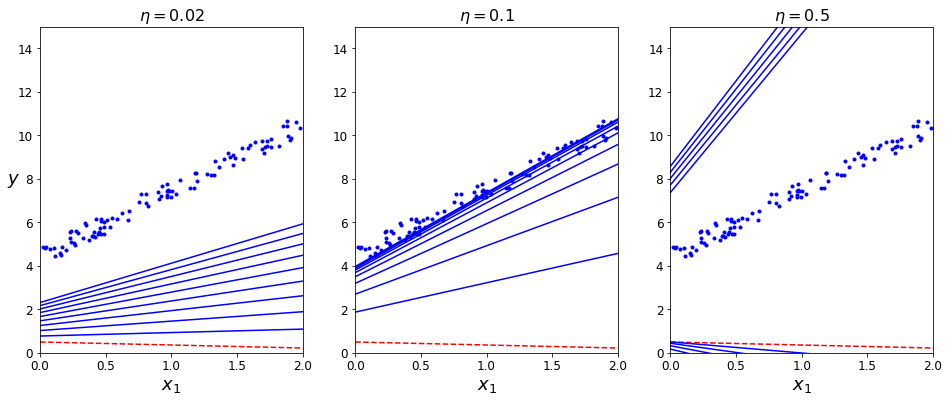

In [30]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(16,6))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

## Stochastic Gradient Descent

The main problem with batch gradient descent is that it uses the whole training set to compute the gradients at every step, which make it very slow.
Stochastic Gradient Descent just picks random instance in the training set at every step and computes the gradients based only on that single instance.
This algorithm is much less regular than the batch gradient descent: the cost function will bunch up and down, decreasing only on average. The final parameter values are good, but not optimal

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)


for epoch in range(n_epochs):
    for i in range(m): 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[ 4.44336557],
       [ 3.04177897]])

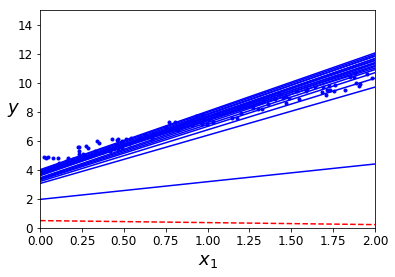

In [36]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"        
            plt.plot(X_new, y_predict, style)   
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)            

plt.plot(X, y, "b.")                              
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)         
plt.axis([0, 2, 0, 15])                         
plt.show()                                 

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=16)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 4.43206528]), array([ 3.01717444]))